In [2]:
import numpy as np 
import pandas as pd
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
os.chdir('C:/Users/N9519661/Desktop/UTKFace')

In [5]:
#Total Number of Files
onlyfiles = os.listdir()
len(onlyfiles)

23708

In [6]:
#Shuffle Files
shuffle(onlyfiles)
gender = [i.split('_')[1] for i in onlyfiles]

In [7]:
classes = []
for i in gender:
    i = int(i)
    classes.append(i)

In [9]:
from imageio import imread

X_data =[]
for file in onlyfiles:
    face = imread(file)
    face = cv2.resize(face, (32, 32) )
    X_data.append(face)

In [11]:
X = np.squeeze(X_data)
X.shape

(23708, 32, 32, 3)

In [12]:
# normalize the data
X = X.astype('float32')
X /= 255

In [13]:
categorical_labels = to_categorical(classes, num_classes=2)

In [15]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

In [16]:
classes = []
for i in age:
    i = int(i)
    if i <= 14:
        classes.append(0)
    if (i>14) and (i<=25):
        classes.append(1)
    if (i>25) and (i<40):
        classes.append(2)
    if (i>=40) and (i<60):
        classes.append(3)
    if i>=60:
        classes.append(4)

In [17]:
from imageio import imread

X_data =[]
for file in onlyfiles:
    face = imread(file)
    face = cv2.resize(face, (32, 32) )
    X_data.append(face)

In [18]:
X = np.squeeze(X_data)
X.shape
# normalize the data
X = X.astype('float32')
X /= 255

In [19]:
categorical_labels = to_categorical(classes, num_classes=5)

In [28]:
#Training 70%
#Testing 15%
#Validation 15%

(x_train, y_train), (x_test, y_test) = (X[:20008],categorical_labels[:20008]) , (X[20008:] , categorical_labels[20008:])
(x_valid , y_valid) = (x_test[:4350], y_test[:4350])
(x_test, y_test) = (x_test[4350:], y_test[4350:])

In [29]:
len(x_train)+len(x_test) + len(x_valid) == len(X)

True

In [30]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [31]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [33]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=5,
         validation_data=(x_valid, y_valid),)

Train on 20008 samples, validate on 3700 samples
Epoch 1/5
20008/20008 [==============================] - 30s 2ms/sample - loss: 1.2719 - accuracy: 0.4660 - val_loss: 1.1012 - val_accuracy: 0.5451
Epoch 2/5
20008/20008 [==============================] - 31s 2ms/sample - loss: 1.0905 - accuracy: 0.5350 - val_loss: 0.9910 - val_accuracy: 0.5741
Epoch 3/5
20008/20008 [==============================] - 31s 2ms/sample - loss: 1.0390 - accuracy: 0.5538 - val_loss: 0.9734 - val_accuracy: 0.5803
Epoch 4/5
20008/20008 [==============================] - 31s 2ms/sample - loss: 1.0009 - accuracy: 0.5716 - val_loss: 0.9512 - val_accuracy: 0.5805
Epoch 5/5
20008/20008 [==============================] - 30s 2ms/sample - loss: 0.9717 - accuracy: 0.5822 - val_loss: 0.9154 - val_accuracy: 0.5986


In [35]:
# Evaluate the model on test set
score = model.evaluate(x_valid, y_valid, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.59864867


In [41]:
labels =["Child","Young Age","Adult", "MID Age","Old Age",]

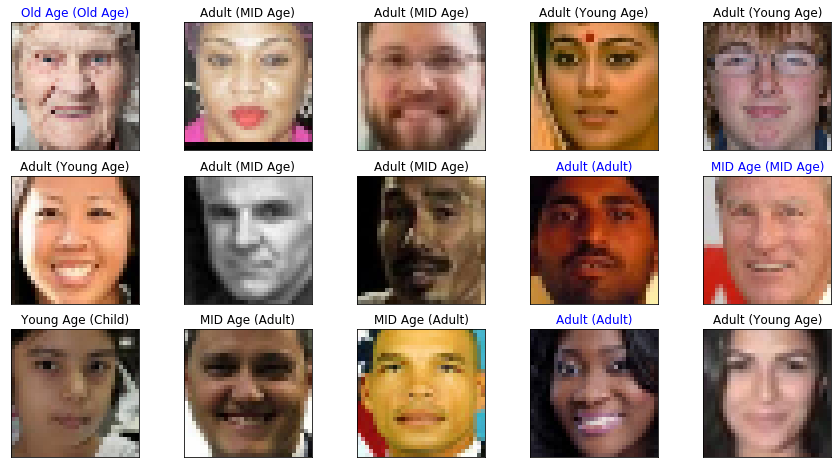

In [42]:
y_hat = model.predict(x_valid)

# Plot Random 10 Images 
figure = plt.figure(figsize=(15, 8))
for i, index in enumerate(np.random.choice(x_valid.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Show the image
    ax.imshow(np.squeeze(x_valid[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_valid[index])
    # Set the title
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("blue" if predict_index == true_index else "black"))
plt.show()